In [1]:
#Importing all the necessary libraries required for analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import HeatMapWithTime
import folium
from datetime import datetime
from collections import defaultdict, OrderedDict
import plotly.graph_objects as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from PIL import Image 
%matplotlib inline 
import numpy as np 
from ipywidgets import widgets
from collections import Counter
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  confusion_matrix, precision_recall_fscore_support

In [2]:
#Reading/Loading the csv dataset
#Source: https://www.kaggle.com/sobhanmoosavi/us-accidents
data=pd.read_csv("US_Accidents_Dec20_updated.csv")

In [3]:
data.head()

ID  Severity           Start_Time             End_Time  Start_Lat  \
0  A-2716600         3  2016-02-08 00:37:08  2016-02-08 06:37:08   40.10891   
1  A-2716601         2  2016-02-08 05:56:20  2016-02-08 11:56:20   39.86542   
2  A-2716602         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10266   
3  A-2716603         2  2016-02-08 06:15:39  2016-02-08 12:15:39   39.10148   
4  A-2716604         2  2016-02-08 06:51:45  2016-02-08 12:51:45   41.06213   

   Start_Lng   End_Lat   End_Lng  Distance(mi)  \
0  -83.09286  40.11206 -83.03187         3.230   
1  -84.06280  39.86501 -84.04873         0.747   
2  -84.52468  39.10209 -84.52396         0.055   
3  -84.52341  39.09841 -84.52241         0.219   
4  -81.53784  41.06217 -81.53547         0.123   

                                         Description  ...  Roundabout Station  \
0  Between Sawmill Rd/Exit 20 and OH-315/Olentang...  ...       False   False   
1                 At OH-4/OH-235/Exit 41 - Accident.  ...       False   False   
2                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
3                   At I-71/US-50/Exit 1 - Accident.  ...       False   False   
4                    At Dart Ave/Exit 21 - Accident.  ...       False   False   

    Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0  False           False          False        False          Night   
1  False           False          False        False          Night   
2  False           False          False        False          Night   
3  False           False          False        False          Night   
4  False           False          False        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0          Night             Night                 Night  
1          Night             Night                 Night  
2          Night             Night                   Day  
3          Night             Night                   Day  
4          Night               Day                   Day  

[5 rows x 47 columns]

In [4]:
data.tail()

ID  Severity           Start_Time             End_Time  \
1516059  A-4239402         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
1516060  A-4239403         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
1516061  A-4239404         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
1516062  A-4239405         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
1516063  A-4239406         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat  Start_Lng   End_Lat    End_Lng  Distance(mi)  \
1516059   34.00248 -117.37936  33.99888 -117.37094         0.543   
1516060   32.76696 -117.14806  32.76555 -117.15363         0.338   
1516061   33.77545 -117.84779  33.77740 -117.85727         0.561   
1516062   33.99246 -118.40302  33.98311 -118.39565         0.772   
1516063   34.13393 -117.23092  34.13736 -117.23934         0.537   

                                               Description  ...  Roundabout  \
1516059                           At Market St - Accident.  ...       False   
1516060    At Camino Del Rio/Mission Center Rd - Accident.  ...       False   
1516061  At Glassell St/Grand Ave - Accident. in the ri...  ...       False   
1516062     At CA-90/Marina Fwy/Jefferson Blvd - Accident.  ...       False   
1516063              At Highland Ave/Arden Ave - Accident.  ...       False   

        Station   Stop Traffic_Calming Traffic_Signal Turning_Loop  \
1516059   False  False           False          False        False   
1516060   False  False           False          False        False   
1516061   False  False           False          False        False   
1516062   False  False           False          False        False   
1516063   False  False           False          False        False   

        Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight  
1516059            Day            Day               Day                   Day  
1516060            Day            Day               Day                   Day  
1516061            Day            Day               Day                   Day  
1516062            Day            Day               Day                   Day  
1516063            Day            Day               Day                   Day  

[5 rows x 47 columns]

# Triangle Correlation Matrix

<ipython-input-5-7d85959734d6>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.triu(np.ones_like(data.corr(),dtype=np.bool))


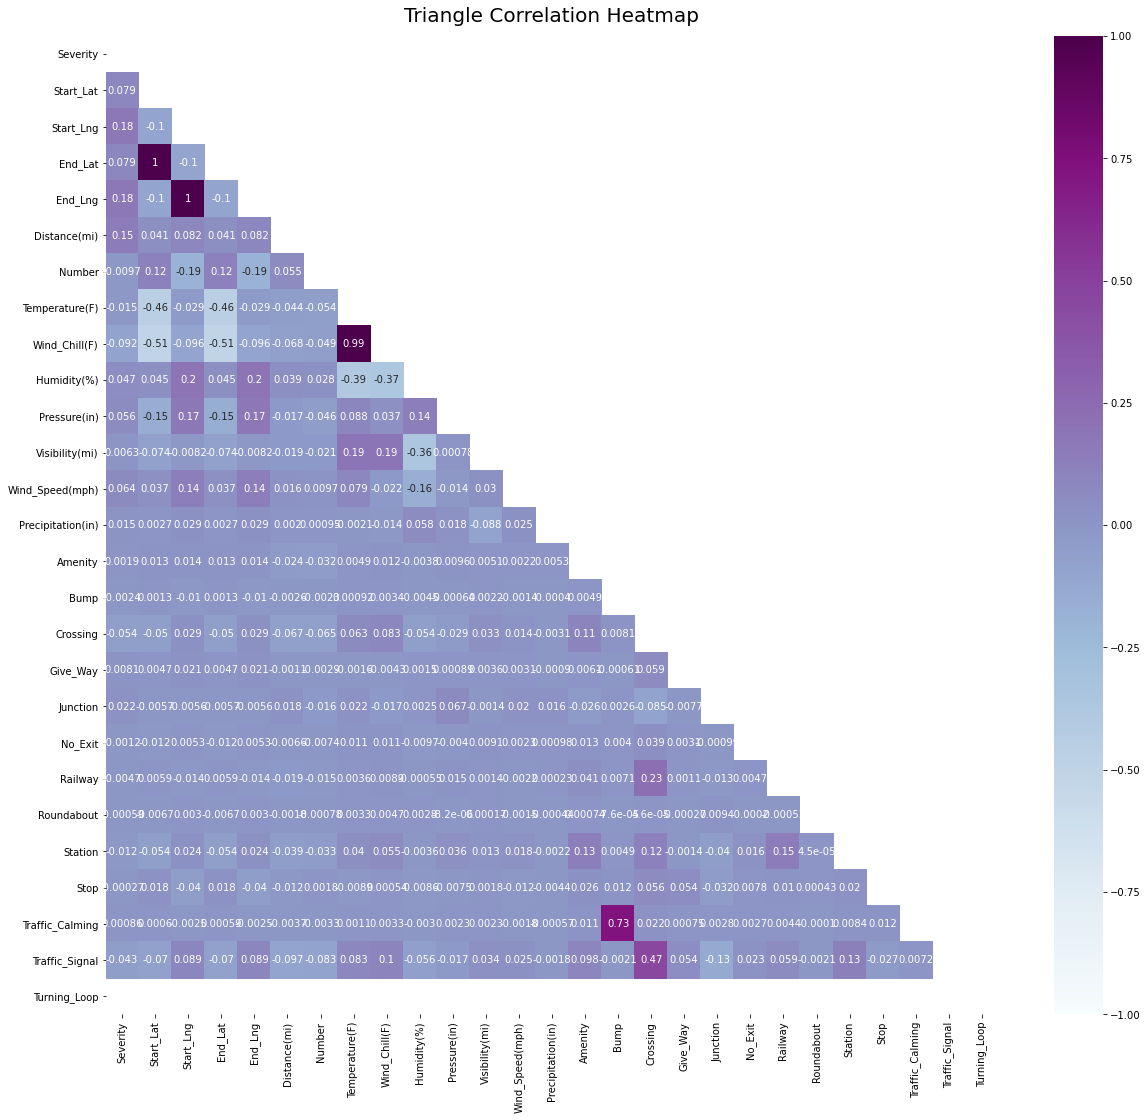

In [5]:
#As we have large number of columns in this dataset, this correlation heatmap is created to 
#visualize the correlation between all the columns. This will be later helpful to us in prediction modelling
np.triu(np.ones_like(data.corr()))
plt.figure(figsize=(20,18))
mask=np.triu(np.ones_like(data.corr(),dtype=np.bool))
heatmap=sns.heatmap(data.corr(),mask=mask,vmin=-1,vmax=1,annot=True,cmap='BuPu')
heatmap.set_title('Triangle Correlation Heatmap',fontdict={'fontsize':20},pad=14);

In [6]:
#As the dataset is huge, I analyzed the first 100000 rows
sample_Data = data[:100000]
mean_Latitude=sample_Data['End_Lat'].mean() 
mean_Longitude=sample_Data['End_Lng'].mean() 

In [7]:
#Creation of a class that gives the coordinates of the location of accidents on a given date
dict_Of_Dates = defaultdict(list)
for x,y in enumerate(sample_Data['Start_Time']):
  dict_Of_Dates[y.split(' ')[0]].append([sample_Data.iloc[x,4],sample_Data.iloc[x,5]])

dict_Of_Dates = OrderedDict(sorted(dict_Of_Dates.items(),key=lambda x:x[0]))

# Geomap showing accidents across USA on different dates

In [9]:
baseMap = folium.Map((mean_Latitude, mean_Longitude), zoom_start=4, tiles="Stamen Toner")

baseMap2= HeatMapWithTime(
    data=list(dict_Of_Dates.values()),
    index=list(dict_Of_Dates.keys()), 
    auto_play=True,
    max_opacity=0.4,
    radius=40
)
baseMap2.add_to(baseMap)
baseMap

# Severity Level Map

In [10]:
sampleData_2 = data.sample(n=10000)

map1 = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = sampleData_2['Start_Lng'],
        lat = sampleData_2['Start_Lat'],
        text = sampleData_2['City'],
        mode = 'markers',
        marker = dict(
            size = 12,
            opacity = 0.8,
            reversescale = False,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=2,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmax = sampleData_2['Severity'].max(),
        color = sampleData_2['Severity'],
        cmin = 0,
            colorbar_title="Severity"
        )))

map1.update_layout(
        title = 'Severity of accidents across USA',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.7,
            subunitwidth = 0.7
        ),
    )
map1.show()

# Wordcloud for USA Map

In [11]:
#Checking intensity of pixels. To create a word cloud in a USA map, the intensity of the pixels should be 255.
#Value of 255 suggests the image pixels are pure white
u1=np.array(Image.open("usa.jpg"))
u1

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [12]:
#The keywords from the Description column in the dataset are shown in the form of USA map
plt.style.use('seaborn')
keyWords = data["Description"].str.split("(").str[0].value_counts().keys()

cloudOfWords = WordCloud(scale=5,max_words=1000,mask=u1,contour_width=1,contour_color='firebrick',background_color="white").generate(" ".join(keyWords))
plt.figure(figsize=(20,10))
plt.imshow(cloudOfWords,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words from the Description of Accidents", size=20, color='black')
plt.show()

In [13]:
#Creation of separate dataframe for states
df_State = pd.DataFrame(data['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Total number of accidents'})

# Top 10 States with highest accidents

In [14]:
top_10=pd.DataFrame(df_State.head(10))
top_10

State  Total number of accidents
0    CA                     448833
1    FL                     153007
2    OR                      87484
3    TX                      75142
4    NY                      60974
5    MN                      52345
6    VA                      51198
7    NC                      50159
8    PA                      42844
9    IL                      41709

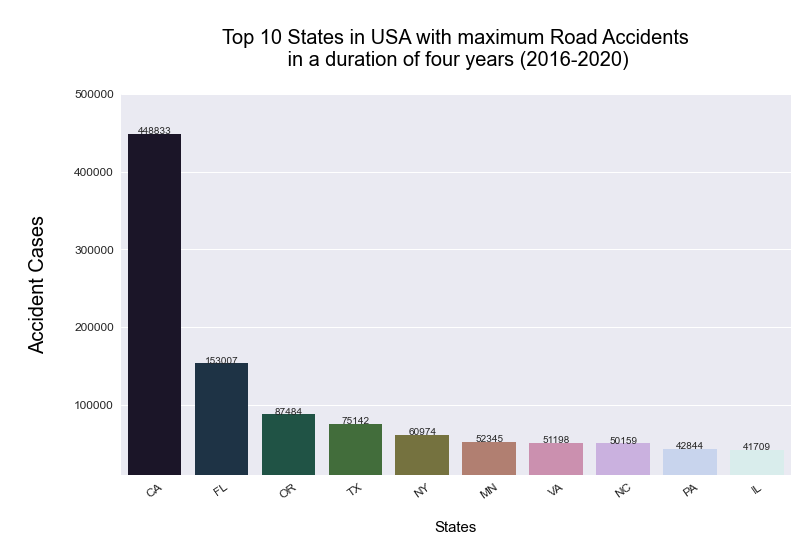

In [15]:
def addingLabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

if __name__ == '__main__':
    
    fig, ax2 = plt.subplots(figsize = (12,7))

    ax2=sns.barplot(x=top_10['State'],y=top_10['Total number of accidents'], palette='cubehelix')
    x=top_10['State']
    y=top_10['Total number of accidents']
    total = sum(df_State['Total number of accidents'])

    addingLabels(x,y)
    plt.title('\nTop 10 States in USA with maximum Road Accidents\n in a duration of four years (2016-2020)\n', size=20, color='black')


    plt.ylim(10000, 500000),plt.xticks(rotation=35, fontsize=12),plt.yticks(fontsize=12)

    ax2.set_xlabel('\nStates\n', fontsize=15, color='black')
    ax2.set_ylabel('\nAccident Cases\n', fontsize=20, color='black')


    plt.show()


# Plotting of hourly accident cases

In [16]:
#Creation of dataframes to separate the date component from time 
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
df2 = data[['Start_Time']].copy()   
df2['Day'] = df2['Start_Time'].dt.day
df2['Month'] = df2['Start_Time'].dt.month
df2['Year'] = df2['Start_Time'].dt.year
df2['Weekday'] = df2['Start_Time'].dt.weekday
df2['Hour'] = df2['Start_Time'].dt.hour
df2.head()

Start_Time  Day  Month  Year  Weekday  Hour
0 2016-02-08 00:37:08    8      2  2016        0     0
1 2016-02-08 05:56:20    8      2  2016        0     5
2 2016-02-08 06:15:39    8      2  2016        0     6
3 2016-02-08 06:15:39    8      2  2016        0     6
4 2016-02-08 06:51:45    8      2  2016        0     6

C:\Users\Atharva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, '\nAccident Cases\n')

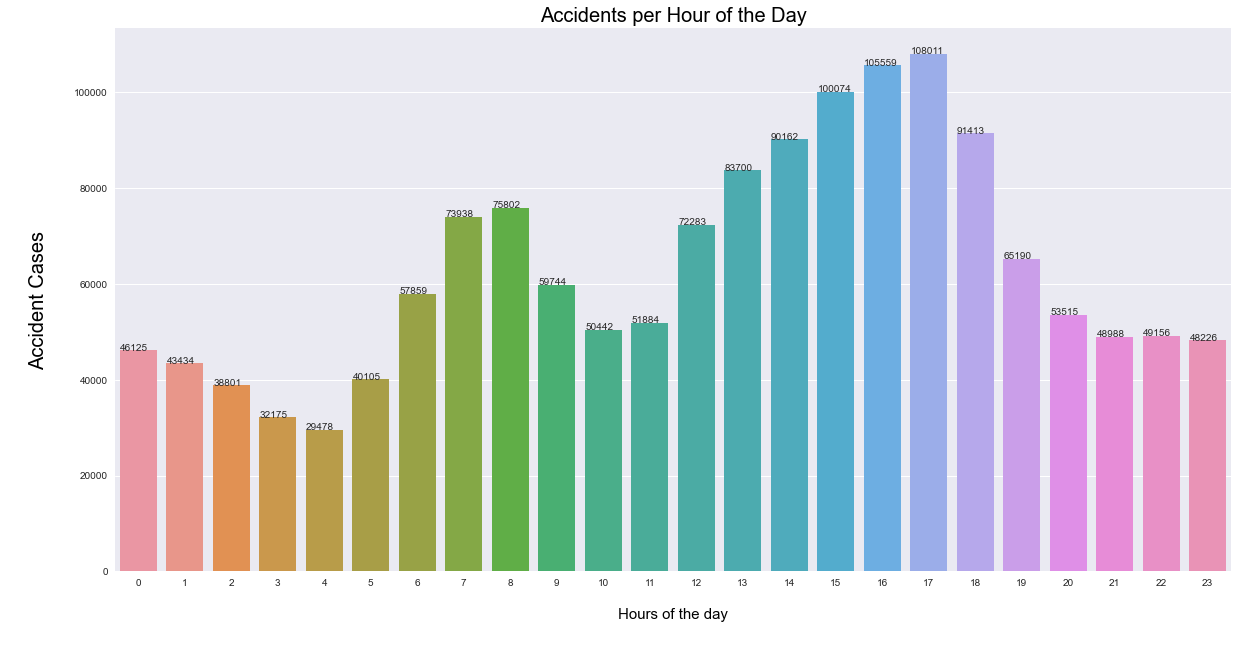

In [17]:
plt.figure(figsize = (20,10))
ax=sns.countplot(df2.Hour)

plt.title('Accidents per Hour of the Day', size=20, color='black')

for z in ax.patches:
    ax.annotate('{:.0f}'.format(z.get_height()), (z.get_x()+0.01, z.get_height()+3.5))

    
ax.set_xlabel('\nHours of the day\n', fontsize=15, color='black')
ax.set_ylabel('\nAccident Cases\n', fontsize=20, color='black')

# Accident Cases in different weather conditions

In [18]:
#The maximum accident cases that occured in 8 different weather conditions are plotted
plt.figure(figsize=(10,8))
df3 = data.groupby('Weather_Condition').size().sort_values(ascending =False).iloc[:8].plot.pie(explode=[0.1,0,0,0,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.ylabel("Weather Condition")
plt.show()

# Accidents region wise (Difference of Timezone)


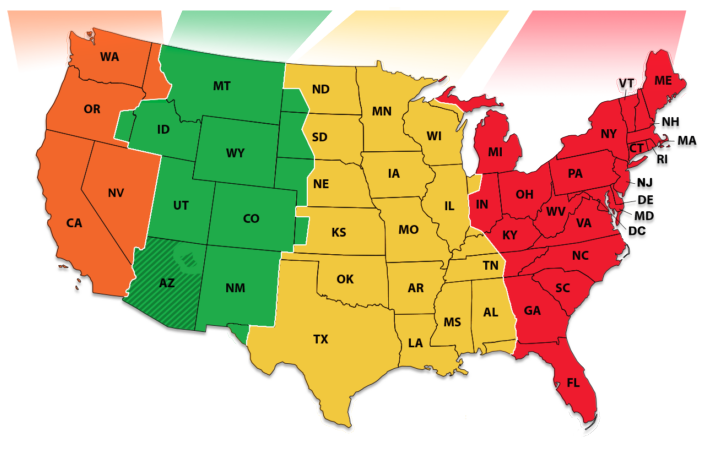

In [19]:
#Loading of image
img=np.array(Image.open('united-states-map.png'))
fig=plt.figure(figsize=(25,8)) 
plt.imshow(img,interpolation='bilinear') 
plt.axis('off') 
plt.show()

C:\Users\Atharva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



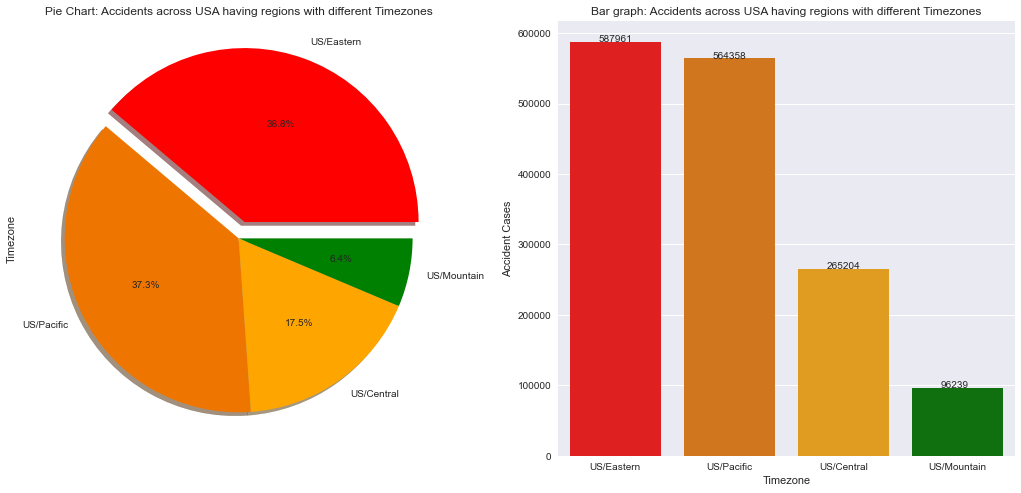

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
colors = ['#ff0000','#ee7600','#ffa500','#008000']
data['Timezone'].value_counts().plot.pie(explode=[0.1,0.0,0.0,0.0],autopct='%1.1f%%',ax=ax[0],shadow=True,colors=colors)
ax[0].set_title('Pie Chart: Accidents across USA having regions with different Timezones')
sns.countplot('Timezone',data=data,ax=ax[1],order=data['Timezone'].value_counts().index,palette=['#ff0000','#ee7600','#ffa500','#008000'])
ax[1].set_title('Bar graph: Accidents across USA having regions with different Timezones')
ax[1].set_ylabel('Accident Cases')
for z in ax[1].patches:
    ax[1].annotate('{:.0f}'.format(z.get_height()), (z.get_x()+0.25, z.get_height()+3.5))
plt.show()

# Top 20 accident prone streets

In [21]:
#Creation of dataframe to show top 20 dangerous accident prone streets
top_20Streets=data["Street"].value_counts().sort_values()[-20:].reset_index()
top_20Streets.columns=["Street Name","Accident Cases"]

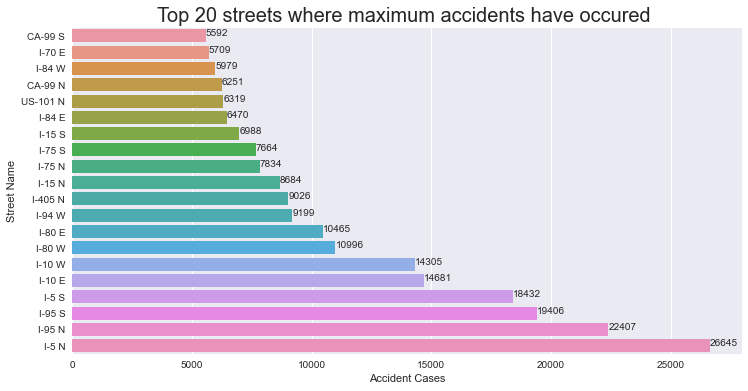

In [22]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)


plt.figure(figsize=(12,6))
p=sns.barplot(y=top_20Streets["Street Name"],x=top_20Streets["Accident Cases"])
plt.xticks(rotation=0)
plt.title("Top 20 streets where maximum accidents have occured ",fontsize=20)
show_values(p,"h",space=0)
plt.show()


# Accident Cases per month

C:\Users\Atharva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



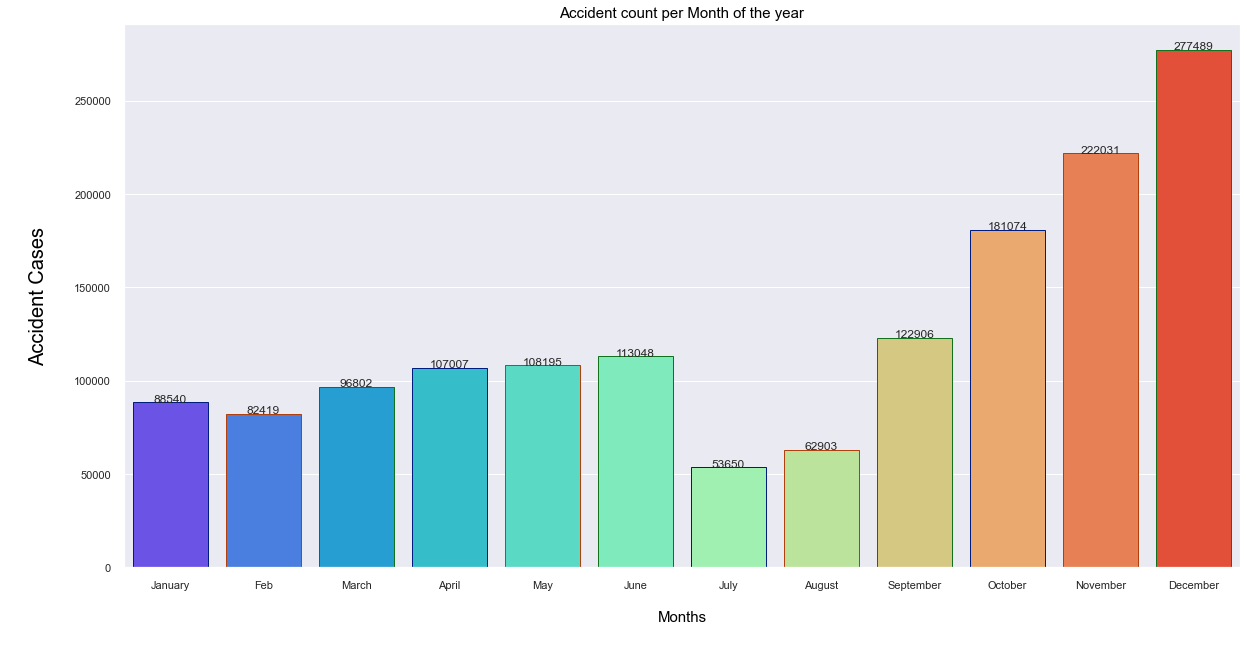

In [23]:
plt.figure(figsize = (20,10))
sns.set_theme(style="darkgrid")
a=sns.countplot(df2.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','Feb','March','April','May','June','July','August','September','October','November','December']), order = ['January','Feb','March','April','May','June','July','August','September','October','November','December'],orient="v",palette="rainbow",edgecolor=sns.color_palette("dark",3))
plt.title('Accident count per Month of the year',fontsize=15, color='black')

a.set_xlabel('\nMonths\n', fontsize=15, color='black')
a.set_ylabel('\nAccident Cases\n', fontsize=20, color='black')

for z in a.patches:
    a.annotate('{:.0f}'.format(z.get_height()), (z.get_x()+ z.get_width() / 2, z.get_height()),ha='center')

    
plt.show()

 # Interactive widget tool


In [24]:
#Creation of dataframes to make an interactive tool 
df2['State'] = data['State']
df2['City'] = data['City']
df2['County']=data['County']
df2['Severity']=data['Severity']
df2.head()

Start_Time  Day  Month  Year  Weekday  Hour State        City  \
0 2016-02-08 00:37:08    8      2  2016        0     0    OH      Dublin   
1 2016-02-08 05:56:20    8      2  2016        0     5    OH      Dayton   
2 2016-02-08 06:15:39    8      2  2016        0     6    OH  Cincinnati   
3 2016-02-08 06:15:39    8      2  2016        0     6    OH  Cincinnati   
4 2016-02-08 06:51:45    8      2  2016        0     6    OH       Akron   

       County  Severity  
0    Franklin         3  
1  Montgomery         2  
2    Hamilton         2  
3    Hamilton         2  
4      Summit         2

In [25]:
df2['City'].unique()

array(['Dublin', 'Dayton', 'Cincinnati', ..., 'Succasunna', 'Valleyford',
       'American Fork-Pleasant Grove'], dtype=object)

In [26]:
month = widgets.IntSlider(
    value=1.0,
    min=1.0,
    max=12.0,
    step=1.0,
    description='Month:',
    continuous_update=False
)

use_day = widgets.Checkbox(
    description='Day: ',
    value=True,
)

container = widgets.HBox(children=[month])

textbox = widgets.Dropdown(
    description='Cities:   ',
    value='Dublin',
    options=df2['City'].unique().tolist()
)

origin = widgets.Dropdown(
    options=list(df2['State'].unique()),
    value='OH',
    description='States',
)


# Assign an empty figure widget with trace
trace1 = go.Histogram(x=df2['Severity'], opacity=0.75, name='Severity')
g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title=dict(
                            text='Severity Interactive widget'
                        ),
                        barmode='overlay'
                    ))




In [27]:
def validate():
    if origin.value in df2['State'].unique() and textbox.value in df2['City'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        if use_day.value:
            filter_list = [i and j and k for i, j, k in
                           zip(df2['Month'] == month.value, df2['City'] == textbox.value,
                               df2['State'] == origin.value)]
            temp_df = df2[filter_list]

        else:
            filter_list = [i and j for i, j in
                           zip(df2['City'] == 'Dublin', df2['State'] == origin.value)]
            temp_df = df2[filter_list]
        x1 = temp_df['Severity']
        with g.batch_update():
            g.data[0].x = x1
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'Severity'
            g.layout.yaxis.title = 'Accident Cases'


origin.observe(response, names="value")
textbox.observe(response, names="value")
month.observe(response, names="value")
use_day.observe(response, names="value")

In [28]:
container2 = widgets.HBox([origin, textbox])
widgets.VBox([container,
              container2,
              g])

# Prediction Modelling

In [29]:
#Creation of Duration & Hour column which could be good features for training the data

data["Duration"] = (pd.to_datetime(data["End_Time"]) - pd.to_datetime(data["Start_Time"])).dt.total_seconds()


In [30]:
data["Hour"] = pd.to_datetime(data["Start_Time"]).dt.hour


In [31]:
#With reference to our first Heatmap, it is noted that the Start_Lat column and End_Lat column has very high correlation. 
#The Start_Lng and End_Lng also has very high correlation. 
#Therefore, other feathers like End_Lat and End_Lng can simply be ignored


features = [
    'Severity', 'Duration', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Hour'
]

In [32]:
data[features].isna().sum(axis=0)/len(data)

Severity             0.000000
Duration             0.000000
Start_Lat            0.000000
Start_Lng            0.000000
Distance(mi)         0.000000
Temperature(F)       0.028385
Wind_Chill(F)        0.296370
Humidity(%)          0.030018
Pressure(in)         0.023926
Visibility(mi)       0.029162
Wind_Speed(mph)      0.084998
Precipitation(in)    0.336760
Hour                 0.000000
dtype: float64

In [33]:
#Replacing columns having null values with 0
features = [
    'Severity', 'Duration', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Hour'
]

data = data[features].fillna(0)

In [34]:
data = data.sample(frac=1.0)

#Splitting the data: 80% for training, 20% for testing
df_train = data.iloc[:int(0.8*len(data))]
df_test = data.iloc[int(0.8*len(data)):]


In [35]:
#Next, the data is split so that the Severity is the label and the other columns remain as the features. 
#Features have different scales so to make the model run more efficiently, we will scale to features.


y_train = df_train["Severity"].values
x_train = df_train[[column for column in features if column != "Severity"]]

y_test = df_test["Severity"]
x_test = df_test[[column for column in features if column != "Severity"]]

# Scale the input data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [36]:
#Now let's take a look at the balance of classes in the train set
Counter(y_train)

Counter({2: 969625, 4: 91453, 3: 129208, 1: 22565})

In [37]:
#This means the data is highly unbalanced.
#The majority of the accidents is of Severity 2 and 4 while very few fall in Severity 1 category.
#If this data is used to train the model, the performance would be very low.
#Therefore, a sample size in each class could be selected to train the model

In [38]:
sample_per_class = 5000

mask_1 = [i for i, val in enumerate(y_train) if val == 1][:sample_per_class]
mask_2 = [i for i, val in enumerate(y_train) if val == 2][:sample_per_class]
mask_3 = [i for i, val in enumerate(y_train) if val == 3][:sample_per_class]
mask_4 = [i for i, val in enumerate(y_train) if val == 4][:sample_per_class]

mask = np.array(mask_1 + mask_2 + mask_3 + mask_4)

x_train_sample = x_train[mask]
y_train_sample = y_train[mask]

print(Counter(y_train_sample))

Counter({1: 5000, 2: 5000, 3: 5000, 4: 5000})


# Building Model 1: Support Vector Machine Classifier

In [40]:
# As the complexity of the SVC is O(N^3), the number of training sets have to be limited
support_vector_classifier = SVC(gamma='auto', class_weight="balanced")
n_train = 20000
n_test = 20000

# Training the SVC
support_vector_classifier.fit(x_train_sample[:n_train], y_train_sample[:n_train])

# Making predictions on the test dataset
y_pred_svm = support_vector_classifier.predict(x_test[:n_test])
y_true_svm = y_test[:n_test]

# Calculation of different metrics
print("Mean accuracy on the test dataset: ", np.mean(y_true_svm == y_pred_svm))


svm_cm = confusion_matrix(y_true_svm, y_pred_svm)
print("Confusion Matrix:")
print(svm_cm)

_, _, f1_svm, _ = precision_recall_fscore_support(y_true_svm, y_pred_svm)
print("F-1 Score for each class")
print(f1_svm)


Mean accuracy on the test dataset:  0.43295
Confusion Matrix:
[[ 320   11   33   31]
 [3445 6665 2521 3352]
 [ 297  398  900  509]
 [ 164  218  362  774]]
F-1 Score for each class
[0.13849816 0.57271751 0.30405405 0.25032342]


# Building Model 2: Decision Tree Classifier

In [41]:
# Training the Tree Classifier
tree_classifier = DecisionTreeClassifier(max_depth=20, class_weight="balanced")
tree_classifier.fit(x_train_sample[:n_train], y_train_sample[:n_train])

# Making the prediction on the test datasets
y_true_tree = y_test[:n_test]
y_pred_tree = tree_classifier.predict(x_test[:n_test])

# Getting different metrics based on the prediction of the test dataset
print("Mean accuracy on the test dataset: ", np.mean(y_true_tree == y_pred_tree))

tree_cm = confusion_matrix(y_true_tree, y_pred_tree)
print("Confusion matrix:")
print(tree_cm)

_, _, f1_tree, _ = precision_recall_fscore_support(y_true_tree, y_pred_tree)
print("F-1 Score for each class")
print(f1_tree)


Mean accuracy on the test dataset:  0.62595
Confusion matrix:
[[  350    12    23    10]
 [  511 10174  2474  2824]
 [  132   276  1137   559]
 [   29   215   416   858]]
F-1 Score for each class
[0.49400141 0.76324081 0.36951576 0.2974519 ]


In [42]:
#Plotting Recall Matrix
y = ['Severity: 1', 'Severity: 2', 'Severity: 3', 'Severity: 4']
x = ['Predicted value: 1', 'Predicted value: 2', 'Predicted value: 3', 'Predicted value: 4']  
plot = go.Figure(
    data=[
        go.Heatmap(
            name='SVC',
            x=x,
            y=y,
            z=svm_cm/np.sum(svm_cm, axis=1).reshape((-1, 1)),
        ),
        go.Heatmap(
            name='Tree',
            x=x,
            y=y,
            z=tree_cm/np.sum(tree_cm, axis=1).reshape((-1, 1)),
            visible=False,
        )
    ]
)
  
  
#Interactivity
plot.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(label="SVC",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Recall for SVC"}]),
                dict(label="Decision Tree",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Recall for Decision Tree"}]),
            ]),
        )
    ])
  
plot.show()

In [43]:
#This reads that following each row in SVC: for 100 Severity Category 1 samples, 
#the models predict 81% of them are Category 1, 2.7 of them are category 2,
#8% of them are category 3, and 7.88% of them are category 4

# Plotting Precision Matrix

In [44]:
y = ['Severity: 1', 'Severity: 2', 'Severity: 3', 'Severity: 4']
x = ['Predicted value: 1', 'Predicted value: 2', 'Predicted value: 3', 'Predicted value: 4']  
plot = go.Figure(
    data=[
        go.Heatmap(
            name='SVC',
            x=x,
            y=y,
            z=svm_cm/np.sum(svm_cm, axis=0),
        ),
        go.Heatmap(
            name='Tree',
            x=x,
            y=y,
            z=tree_cm/np.sum(tree_cm, axis=0),
            visible=False,
        )
    ]
)
  
  
#Interactivity
plot.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(label="SVC",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Precision for SVM"}]),
                dict(label="Decision Tree",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Precision for Decision Tree"}]),
            ]),
        )
    ])
  
plot.show()

In [45]:
#This reads that following the vertical direction for SVC,
#if the the model makes 100 predictions that Severity is of category 1,
#only 7% are actually category 1, 82% are actually category 2, 7.6% are actually category 3, and 3.1% are actually category 4.

In [46]:
#Plotting F1 scores
x = ['Severity: 1', 'Severity: 2', 'Severity: 3', 'Severity: 4']
  
plot = go.Figure(
    data=[
        go.Bar(
            name='SVC',
            x=x,
            y=f1_svm
        ),
        go.Bar(
            name='Tree',
            x=x,
            y=f1_tree
        )
    ]
)
  
  
#Adding buttons
plot.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "F1 Scores for Both Classifiers"}]),
                dict(label="SVC",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "F1 Scores for Support Vector Classifier"}]),
                dict(label="Decision Tree",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "F1 Scores for Decision Tree Classifier"}]),
            ]),
        )
    ],
    yaxis_range=[0, 1])
  
plot.show()

In [47]:
# Combining Prediction from both Models
df_both = pd.DataFrame({"y_true": y_true_svm, "y_pred_svm": y_pred_svm, "y_pred_tree": y_pred_tree})
df_both = df_both.reset_index(drop=True)
df_both

y_true  y_pred_svm  y_pred_tree
0           2           2            2
1           2           2            4
2           2           2            4
3           2           4            4
4           2           2            2
...       ...         ...          ...
19995       2           2            2
19996       2           2            4
19997       2           2            4
19998       2           2            2
19999       1           1            1

[20000 rows x 3 columns]

# Visualization from both the models

In [48]:
# Creation of figure
fig = go.Figure()

# Adding traces, one for each slider step
for step in np.arange(0, 100, 10):
    fig.add_trace(
        go.Scatter(
            visible=False,
            x=df_both.iloc[step:step + 10].index,
            y=df_both.iloc[step:step + 10].y_true,
            mode="markers",
            name="Truth",
            marker={"size": 24, "color": "green", "line":{"width": 2, "color": "black"}}
        )
    )
    fig.add_trace(
        go.Scatter(
            visible=False,
            x=df_both.iloc[step:step + 10].index,
            y=df_both.iloc[step:step + 10].y_pred_svm + 0.05,
            mode="markers",
            name="SVM",
            marker={"size": 12, "color": "red", "line":{"width": 2, "color": "black"}}
        )
    ),
    fig.add_trace(
        go.Scatter(
            visible=False,
            x=df_both.iloc[step:step + 10].index,
            y=df_both.iloc[step:step + 10].y_pred_tree + 0.1,
            mode="markers",
            name="Decision Tree",
            marker={"size": 12, "color": "blue", "line":{"width": 2, "color": "black"}}
        )
    )

# Making 10th trace visible
fig.data[0].visible = True
fig.data[1].visible = True
fig.data[2].visible = True

# Creation and addition of slider
steps = []
for i in range(len(fig.data)//3):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to index: " + str(i*10)}],  # layout attribute
    )
    step["args"][0]["visible"][3*i] = True  # Toggle i'th trace to "visible"
    step["args"][0]["visible"][3*i + 1 ] = True  # Toggle i'th trace to "visible"
    step["args"][0]["visible"][3*i + 2 ] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Start index: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()